## 스터디카페 매출 데이터분석
- entry_data: '모두 스터디카페'의 시간별 입장 기록 데이터
- sales_data: '모두 스터디카페'의 시간별 음식/음료 판매 데이터
- item_data: '모두 스터디카페'에서 판매하고 있는 음식/음료 종류와 가격
- item_entry_data: '모두 스터디카페'에서 판매하고 있는 입장권 종류와 가격

## 결과도출
- 월별 매출액 추세
- 가장 인기있는 음식/음료
- 가장 많이 팔린 입장권 종류

### 1. 데이터호출

In [8]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [2]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [3]:
# entry_data 데이터 정보 확인하기
entry_data

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [4]:
# dales_data 데이터 정보 확인하기
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN


In [5]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [6]:
# item_entry_data 데이터 정보 확인하기
item_entry_data

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"
5,6,한국대생,한국대생 요금제,"1,500원"
6,7,18시이후,거리두기4단계,"1,000원"
7,8,심야-조조,심야-조조 요금제,"2,500원"
8,9,일반인,일반요금제,"3,000원"
9,10,일반인,일반요금제,"7,000원"


### 2. 데이터 분석하기
## 문제 1. 월별 매출액 추세(sales_data)

In [10]:
temp_var = sales_data
temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [12]:
# 결제일시를 월만 출력
temp_var['date'] = sales_data['결제일시'].str[:7]
temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04


In [13]:
# sales_data 의 결제금액에 포한된 쉼표(,) 지우기

sales_data['결제금액'] = sales_data['결제금액'].str.replace(',', '').astype(int)
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04


In [14]:
grouped = sales_data['결제금액'].groupby(sales_data['date']).sum()
grouped

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

완료!


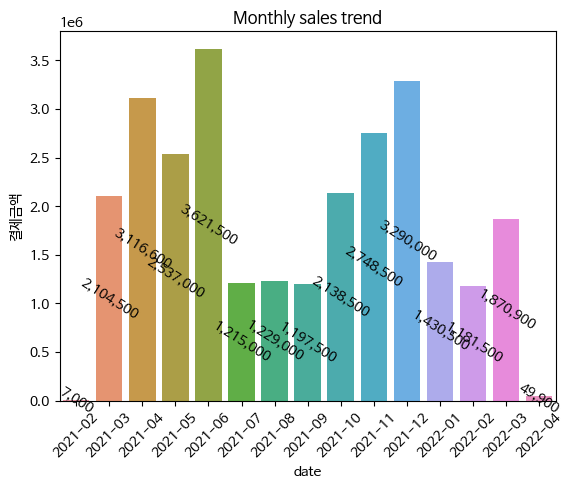

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

ax = sns.barplot(data=grouped.reset_index(), x='date', y='결제금액')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center', rotation=-32)
plt.xticks(rotation=45)
plt.title('Monthly sales trend')
plt.show()

In [24]:
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


In [27]:
temp_var = sales_data[sales_data['판매수량'] == 1]
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7097,2021-02-17 13:48,선불기2,카페모카(HOT),현금,결제완료,1,4500,NaN,2021-02
7098,2021-02-17 13:50,선불기2,카페모카(HOT),현금,결제완료,1,4500,NaN,2021-02
7099,2021-02-17 13:46,카운터,아메리카노(HOT),현금,결제완료,1,3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02


In [28]:
temp_var['상품명'].value_counts()

김치볶음밥          1204
라면              749
짜장라면            455
치즈불고기볶음밥        420
계란추가            314
               ... 
라면(계란/치즈추가)       1
녹차(HOT)           1
짜장라면(계란추가)        1
이어폰(커널형)          1
오늘은 한돈간장불고기       1
Name: 상품명, Length: 100, dtype: int64

In [32]:
df =pd.DataFrame(temp_var['상품명'].value_counts().reset_index())
df.columns = ['상품명', '개수']
df

,상품명,개수
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
...,...,...
95,라면(계란/치즈추가),1
96,녹차(HOT),1
97,짜장라면(계란추가),1
98,이어폰(커널형),1


In [33]:
items_count = df.head(10)
items_count.index = items_count.index+1
items_count


,상품명,개수
1,김치볶음밥,1204
2,라면,749
3,짜장라면,455
4,치즈불고기볶음밥,420
5,계란추가,314
6,낙지볶음밥,312
7,새우볶음밥,309
8,아메리카노(ICE),284
9,치즈감자튀김,246
10,감자튀김,242


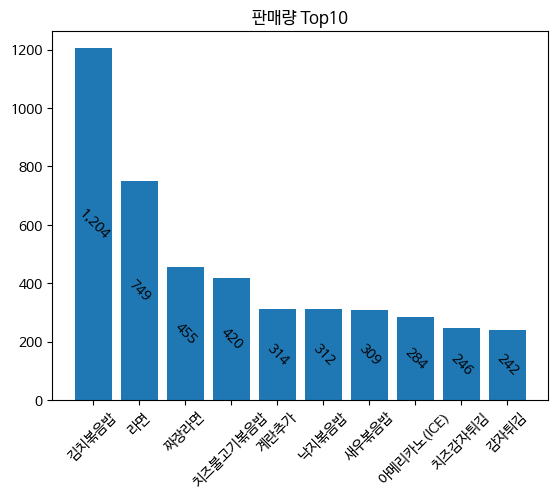

In [38]:
ax = plt.bar(items_count['상품명'], items_count['개수'])

plt.bar_label(ax,labels =[f'{x:,.0f}' for x in ax.datavalues], label_type='center', rotation = -45)
plt.title('판매량 Top10')
plt.xticks(rotation=45)
plt.show()

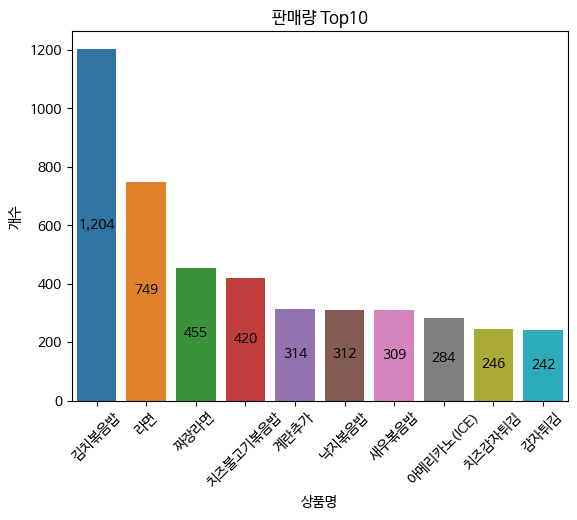

In [39]:
ax = sns.barplot(data=items_count,x='상품명',y='개수')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('판매량 Top10')
plt.xticks(rotation=45)
plt.show()

In [40]:
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7097,2021-02-17 13:48,선불기2,카페모카(HOT),현금,결제완료,1,4500,NaN,2021-02
7098,2021-02-17 13:50,선불기2,카페모카(HOT),현금,결제완료,1,4500,NaN,2021-02
7099,2021-02-17 13:46,카운터,아메리카노(HOT),현금,결제완료,1,3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02


## 2. 인기많은 메뉴 Top10

In [42]:
grouped = temp_var['결제금액'].groupby(temp_var['상품명']).sum()
payment = grouped.sort_values(ascending=False).reset_index()
payment.index = payment.index+1
payment.head(10)

,상품명,결제금액
1,김치볶음밥,6004400
2,라면,2941500
3,치즈불고기볶음밥,2292600
4,짜장라면,2038500
5,낙지볶음밥,1710700
6,새우볶음밥,1539800
7,치즈감자튀김,1354200
8,감자튀김,1083800
9,아메리카노(ICE),1058100
10,불닭볶음면,693000


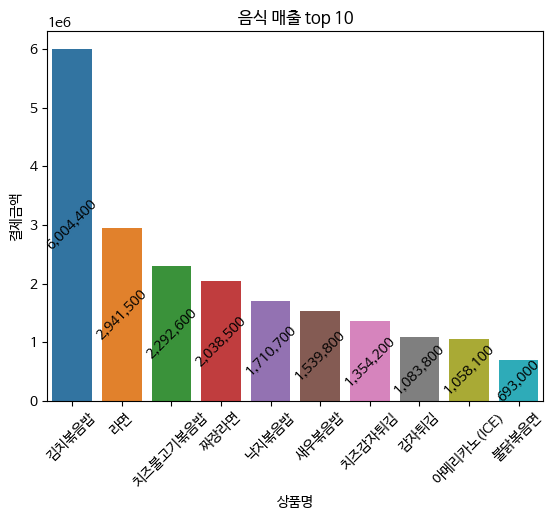

In [43]:
ax = sns.barplot(data=payment.head(10),x='상품명',y='결제금액')
containers = ax.containers[0]
ax.bar_label(containers,labels=[f'{x:,.0f}' for x in containers.datavalues],label_type='center',rotation=45)
plt.title('음식 매출 top 10')
plt.xticks(rotation=45)
plt.show()

In [44]:
entry_data

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


## 3. 입장권 매출 Top10

In [45]:
temp_var = entry_data['금액'].groupby(entry_data['요금제명']).sum()
tickets = temp_var.sort_values(ascending=False).reset_index()
tickets.index = tickets.index+1
tickets

,요금제명,금액
1,한국대생 입장권(종일권),70037000
2,입장권(종일권),23570500
3,심야-조조무제한(06시까지),11600000
4,심야-조조무제한,6221000
5,한국대생 무제한 입장권,5207500
6,시간요금제(1시간),2665500
7,시간요금제(3시간),2042000
8,무제한 입장권,1568600
9,18시이후 무제한,1330500
10,조조무제한,693000


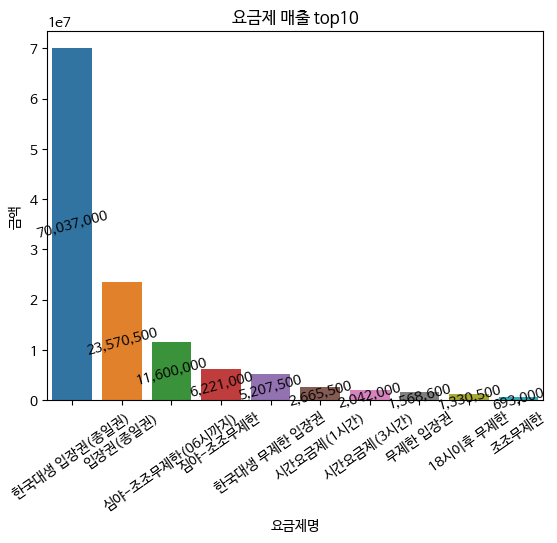

In [46]:
ax = sns.barplot(data=tickets.head(10),x='요금제명',y='금액')
containers = ax.containers[0]
ax.bar_label(containers,labels=[f'{x:,.0f}' for x in containers.datavalues],label_type='center',rotation=15)
plt.xticks(rotation=35)
plt.title('입장권 매출 top10')
plt.show()